In [408]:
import numpy as np
import pandas as pd

In [409]:
# load Data
data = pd.read_excel('BA_AirlineReviews_CL_excel.xlsx')
display(data.head())
data.describe()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


,id,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [410]:
# melihat tipe data pada setiap kolom
print(data.dtypes)

id                                int64
Satisfaction                     object
ReviewHeader                     object
Name                             object
Datetime                         object
VerifiedReview                     bool
ReviewBody                       object
TypeOfTraveller                  object
SeatType                         object
Route                            object
DateFlown                datetime64[ns]
SeatComfort                     float64
CabinStaffService               float64
GroundService                   float64
ValueForMoney                   float64
Recommended                      object
Aircraft                         object
Food&Beverages                  float64
InflightEntertainment           float64
Wifi&Connectivity               float64
dtype: object


In [411]:
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

== Preposesing Data ==

In [412]:
# isi menggunakan missing value dengan KNN imputer pada kolom 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment'
from sklearn.impute import KNNImputer

# Definisikan kolom yang akan diimputasi
columns_to_impute = ['SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment']

# Inisialisasi KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Lakukan imputasi KNN pada kolom yang ditentukan
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Pembulatan nilai imputasi ke angka terdekat antara 1 dan 5
data[columns_to_impute] = np.round(data[columns_to_impute]).astype(int)

# Pastikan nilai berada dalam rentang 1 hingga 5
data[columns_to_impute] = np.clip(data[columns_to_impute], 1, 5)

# Verifikasi apakah missing value sudah diimputasi dan tidak ada yang tersisa
print(data.isnull().sum())


id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity        3092
dtype: int64


In [413]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# 1. Periksa jumlah missing value pada kolom 'DateFlown'
print("Missing values in 'DateFlown':", data['DateFlown'].isnull().sum())

# 2. Ekstrak Month dan Year dari 'DateFlown'
data['DateFlown_m'] = data['DateFlown'].dt.month
data['DateFlown_y'] = data['DateFlown'].dt.year

# 3. Periksa missing value setelah ekstraksi
print("Missing values after extracting Month and Year:\n", data[['DateFlown_m', 'DateFlown_y']].isnull().sum())

# 4. Terapkan imputasi KNN jika masih ada missing value pada 'DateFlown_m' dan 'DateFlown_y'
imputer = KNNImputer(n_neighbors=5)
data[['DateFlown_m', 'DateFlown_y']] = imputer.fit_transform(data[['DateFlown_m', 'DateFlown_y']])

# 5. Verifikasi apakah imputasi sudah berhasil
print("Missing values after KNN Imputation:\n", data[['DateFlown_m', 'DateFlown_y']].isnull().sum())

# 6. Pembulatan dan validasi rentang untuk Month (1-12) dan Year (dalam rentang tahun yang valid)
data['DateFlown_m'] = np.clip(np.round(data['DateFlown_m']).astype(int), 1, 12)

# Pastikan 'DateFlown_y' berada dalam rentang tahun yang valid
data['DateFlown_y'] = np.clip(np.round(data['DateFlown_y']).astype(int), data['DateFlown_y'].min(), data['DateFlown_y'].max())

# 7. Buat mapping ordinal untuk bulan (DateFlown_m) dengan penyesuaian 0.1
# Januari = 0.1, Februari = 0.2, dst.
month_mapping = {month: (month / 10) for month in range(1, 13)}  # Menetapkan bulan Januari = 0.1, dst.
data['DateFlown_m'] = data['DateFlown_m'].map(month_mapping)

# 8. Buat mapping ordinal untuk tahun (DateFlown_y) dengan penyesuaian 0.1
# Menetapkan tahun pertama yang ditemukan sebagai 0.1, dan seterusnya.
unique_years = sorted(data['DateFlown_y'].unique())
year_mapping = {year: ((year - unique_years[0]) * 0.1 + 0.1) for year in unique_years}  # Menetapkan tahun pertama sebagai 0.1
data['DateFlown_y'] = data['DateFlown_y'].map(year_mapping)

# 9. Verifikasi hasil setelah pembulatan dan validasi
print("Unique values in 'DateFlown_m' and 'DateFlown_y' after rounding and encoding:\n", data[['DateFlown_m', 'DateFlown_y']].value_counts())

# 10. Hapus kolom 'DateFlown' setelah ekstraksi dan imputasi
data.drop(columns=['DateFlown'], inplace=True)

# 11. Pastikan kolom 'DateFlown_m' dan 'DateFlown_y' dalam format numerik sebelum encoding
data[['DateFlown_m', 'DateFlown_y']] = data[['DateFlown_m', 'DateFlown_y']].astype(float)

# 12. Inisialisasi OrdinalEncoder dan Terapkan Ordinal Encoding pada kolom 'DateFlown_m' dan 'DateFlown_y'
ordinal_encoder = OrdinalEncoder()

# Terapkan encoding ordinal
data[['DateFlown_m', 'DateFlown_y']] = ordinal_encoder.fit_transform(data[['DateFlown_m', 'DateFlown_y']])

# 13. Verifikasi hasil encoding
print("Encoded values in 'DateFlown_m' and 'DateFlown_y':")
print(data[['DateFlown_m', 'DateFlown_y']].head())

# 14. Periksa jumlah missing value setelah semua langkah
print("Missing values after all steps:\n", data.isnull().sum())

# 15. Periksa jumlah unique value pada kolom 'DateFlown'
print("Number of unique values in 'DateFlown_m':", data['DateFlown_m'].nunique())
print("Number of unique values in 'DateFlown_y':", data['DateFlown_y'].nunique())

# Tampilkan unique value pada kolom 'DateFlown'
print("Unique values in 'DateFlown_m':", data['DateFlown_m'].unique())
print("Unique values in 'DateFlown_y':", data['DateFlown_y'].unique())


Missing values in 'DateFlown': 778
Missing values after extracting Month and Year:
 DateFlown_m    778
DateFlown_y    778
dtype: int64
Missing values after KNN Imputation:
 DateFlown_m    0
DateFlown_y    0
dtype: int64
Unique values in 'DateFlown_m' and 'DateFlown_y' after rounding and encoding:
 DateFlown_m  DateFlown_y
0.7          0.5            809
0.8          0.2             83
0.9          0.2             78
1.1          0.2             66
0.4          0.4             65
                           ... 
0.2          0.8              2
1.0          0.1              1
0.8          0.1              1
0.7          0.1              1
0.6          0.7              1
Length: 112, dtype: int64
Encoded values in 'DateFlown_m' and 'DateFlown_y':
   DateFlown_m  DateFlown_y
0         10.0          9.0
1         10.0          9.0
2         10.0          9.0
3         11.0          8.0
4         10.0          9.0
Missing values after all steps:
 id                          0
Satisfaction    

In [414]:
# menangani missing value pada kolom 'TypeOfTraveller' menggunakan nilai acak dari kolom tersebut
data['TypeOfTraveller'].fillna(data['TypeOfTraveller'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'TypeOfTraveller'
print(data['TypeOfTraveller'].isnull().sum())
data['TypeOfTraveller'].describe()

0


count               3701
unique                 4
top       Couple Leisure
freq                1771
Name: TypeOfTraveller, dtype: object

In [415]:
# menangani missing value pada kolom 'SeatType' nilai acak dari kolom tersebut
data['SeatType'].fillna(data['SeatType'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'SeatType'
print(data['SeatType'].isnull().sum())
data['SeatType'].describe()

0


count              3701
unique                4
top       Economy Class
freq               1929
Name: SeatType, dtype: object

In [416]:
# menangani missing value pada kolom 'Route' nilai acak dari kolom tersebut
data['Route'].fillna(data['Route'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'Route'
print(data['Route'].isnull().sum())
data['Route'].describe()

0


count           3701
unique          1542
top       DXB to LHR
freq             779
Name: Route, dtype: object

In [417]:
# meanangani missing value pada kolom 'Aircraft' menggunakan model prediksi Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoder untuk kolom kategorikal
label_encoder = LabelEncoder()

# Encode kolom Aircraft yang tidak NaN
data['Aircraft_encoded'] = label_encoder.fit_transform(data['Aircraft'].astype(str))

# Split data: rows with missing and without missing values
train_data = data[data['Aircraft'].notnull()].copy()
missing_data = data[data['Aircraft'].isnull()].copy()

# Fitur untuk model prediksi
features = ['Route', 'TypeOfTraveller', 'SeatComfort', 'CabinStaffService']
train_data = train_data.dropna(subset=features)  # Pastikan fitur tidak ada NaN
X_train = pd.get_dummies(train_data[features], drop_first=True)
y_train = train_data['Aircraft_encoded']

# Model untuk memprediksi Aircraft
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi untuk rows dengan missing value
X_missing = pd.get_dummies(missing_data[features], drop_first=True)
X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)
missing_data.loc[:, 'Aircraft_encoded'] = model.predict(X_missing)

# Masukkan kembali prediksi ke data asli
data.loc[data['Aircraft'].isnull(), 'Aircraft'] = label_encoder.inverse_transform(missing_data['Aircraft_encoded'])
data.drop(columns=['Aircraft_encoded'], inplace=True)


In [418]:
# menangani missing value pada kolom wifi&connectivity menggunakan random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Fitur untuk model prediksi
features = ['SeatComfort', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment']

# Split data: rows with missing and without missing values
train_data = data[data['Wifi&Connectivity'].notnull()].copy()
missing_data = data[data['Wifi&Connectivity'].isnull()].copy()

# Pastikan fitur tidak ada NaN
train_data = train_data.dropna(subset=features)

# Fitur dan target untuk model
X_train = train_data[features]
y_train = train_data['Wifi&Connectivity']

# Model untuk memprediksi Wifi&Connectivity
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi untuk rows dengan missing value
X_missing = missing_data[features]
predicted_values = model.predict(X_missing)

# Pembulatan nilai prediksi ke angka terdekat antara 1 dan 5
predicted_values_rounded = np.round(predicted_values).astype(int)

# Pastikan nilai prediksi berada di dalam rentang 1 hingga 5
predicted_values_rounded = np.clip(predicted_values_rounded, 1, 5)

# Masukkan kembali prediksi yang sudah dibulatkan ke data asli
data.loc[data['Wifi&Connectivity'].isnull(), 'Wifi&Connectivity'] = predicted_values_rounded

# Verifikasi apakah missing value sudah diimputasi
print(data['Wifi&Connectivity'].isnull().sum())

#checkl unique value pada kolom 'wifi&connectivity' 
data['Wifi&Connectivity'].unique()


0


array([1., 2., 4., 3., 5.])

====== Encode


In [419]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# 1. Bersihkan format ordinal hari (hapus 'th', 'st', 'nd', 'rd')
data['Datetime'] = data['Datetime'].str.replace(r'(st|nd|rd|th)', '', regex=True)

# 2. Konversi ke tipe datetime
data['Datetime'] = pd.to_datetime(data['Datetime'], errors='coerce')

# 3. Periksa apakah ada nilai yang gagal dikonversi
print("Jumlah nilai gagal konversi (NaT):", data['Datetime'].isna().sum())

# 4. Ekstraksi bulan (Datetime_m) dan tahun (Datetime_y)
data['Datetime_m'] = data['Datetime'].dt.month
data['Datetime_y'] = data['Datetime'].dt.year

# Periksa jumlah bulan dan tahun setelah ekstraksi
print("Unique months:", data['Datetime_m'].unique())
print("Unique years:", data['Datetime_y'].unique())

# 5. Tangani missing value dengan KNN jika ada NaN
imputer = KNNImputer(n_neighbors=5)
data[['Datetime_m', 'Datetime_y']] = imputer.fit_transform(data[['Datetime_m', 'Datetime_y']])

# 6. Pastikan bulan berada dalam rentang 1 hingga 12
data['Datetime_m'] = np.clip(np.round(data['Datetime_m']).astype(int), 1, 12)

# 7. Pastikan tahun berada dalam rentang yang valid (2011-2023)
data['Datetime_y'] = np.clip(np.round(data['Datetime_y']).astype(int), 2011, 2023)

# Periksa kembali jumlah bulan dan tahun setelah pemrosesan
print("Unique months after processing:", data['Datetime_m'].unique())
print("Unique years after processing:", data['Datetime_y'].unique())

# 8. Buat mapping ordinal untuk tahun dan bulan
# Menetapkan nilai ordinal untuk tahun dan bulan, tanpa mengganti nilai yang ada
unique_years = sorted(data['Datetime_y'].unique())
unique_months = sorted(data['Datetime_m'].unique())

year_mapping = {year: i for i, year in enumerate(unique_years)}
month_mapping = {month: i for i, month in enumerate(unique_months)}

data['Datetime_y'] = data['Datetime_y'].map(year_mapping)
data['Datetime_m'] = data['Datetime_m'].map(month_mapping)

# 9. Verifikasi hasil
print("Hasil setelah encoding manual:")
print(data)

# Verifikasi apakah hasil sudah konsisten
print("Unique values in Datetime_y and Datetime_m:")
print(data[['Datetime_y', 'Datetime_m']].drop_duplicates())

# 10. Hapus kolom 'Datetime' setelah ekstraksi
data.drop(columns=['Datetime'], inplace=True)


Jumlah nilai gagal konversi (NaT): 295
Unique months: [11. 10.  9. nan  7.  6.  5.  4.  3.  2.  1. 12.]
Unique years: [2023.   nan 2022. 2021. 2020. 2019. 2018. 2017. 2016. 2015. 2014. 2011.]
Unique months after processing: [11 10  9  7  6  5  4  3  2  1 12]
Unique years after processing: [2023 2017 2022 2021 2020 2019 2018 2016 2015 2014 2011]
Hasil setelah encoding manual:
        id       Satisfaction                              ReviewHeader  \
0        0  Very Dissatisfied    "Service level far worse then Ryanair"   
1        1            Neutral  "do not upgrade members based on status"   
2        2       Enthusiastic             "Flight was smooth and quick"   
3        3  Very Dissatisfied             "Absolutely hopeless airline"   
4        4  Very Dissatisfied        "Customer Service is non existent"   
...    ...                ...                                       ...   
3696  3696  Very Dissatisfied           British Airways customer review   
3697  3697           A

In [420]:
# mengganti label satisfaction menjadi numerik (Very Dissatisfied - Dissatisfied - Neutral - Satisfied - Very Satisfied - Delighted - Extremely Satisfied - Enthusiastic - Advocate - Evangelist)
# dengan menggunakan mapping ordinal
satisfaction_mapping = {
    'Very Dissatisfied': 1,
    'Dissatisfied': 2,
    'Neutral': 3,
    'Satisfied': 4,
    'Very Satisfied': 5,
    'Delighted': 6,
    'Extremely Satisfied': 7,
    'Enthusiastic': 8,
    'Advocate': 9,
    'Evangelist': 10
}

data['Satisfaction'] = data['Satisfaction'].map(satisfaction_mapping)

# Verifikasi hasil mapping
print(data['Satisfaction'].value_counts())

# menampilkan unique value pada kolom 'Satisfaction'
print(data['Satisfaction'].unique())

# menampilkan missing value pada kolom 'Satisfaction'
print(data['Satisfaction'].isnull().sum())

1     867
2     426
3     407
8     370
10    330
7     313
9     310
4     254
5     234
6     190
Name: Satisfaction, dtype: int64
[ 1  3  8  7  2  6  4  5 10  9]
0


In [421]:
# Mengganti Kolom 'VerifiedReview' menjadi numerik dengan menggunakan mapping
# menampilkan unique value pada kolom 'VerifiedReview'
print(data['VerifiedReview'].unique())
# mengganti kolom 'VerifiedReview' menjadi numerik dengan menggunakan mapping
data['VerifiedReview'] = data['VerifiedReview'].astype(int)

# menampilkan unique value pada kolom 'VerifiedReview'
print(data['VerifiedReview'].unique())

[ True False]
[1 0]


In [422]:
# # Mengganti Kolom 'TypeOfTraveller' menjadi numerik dengan menggunakan mapping
# menampilkan unique value pada kolom 'TypeOfTraveller'
print(data['TypeOfTraveller'].unique())
# mengganti kolom 'TypeOfTraveller' menjadi numerik dengan menggunakan mapping
type_of_traveller_mapping = {
	'Solo Leisure': 1,
	'Couple Leisure': 2,
	'Family Leisure': 3,
	'Business': 4,
	'Solo Business': 5,
	'Couple Business': 6,
	'Family Business': 7
}
data['TypeOfTraveller'] = data['TypeOfTraveller'].map(type_of_traveller_mapping)

# menampilkan unique value pada kolom 'TypeOfTraveller'
print(data['TypeOfTraveller'].unique())

['Couple Leisure' 'Business' 'Solo Leisure' 'Family Leisure']
[2 4 1 3]


In [ ]:
# Mengganti kolom 'Recommended' yes jadi 1 dan no jadi 0
# menampilkan unique value pada kolom 'Recommended'
print(data['Recommended'].unique())
# mengganti kolom 'Recommended' menjadi numerik dengan menggunakan mapping
recommended_mapping = {
    'yes': 1,
    'no': 0
}
data['Recommended'] = data['Recommended'].map(recommended_mapping)

# menampilkan unique value pada kolom 'Recommended'
print(data['Recommended'].unique())

============================================== /// ========================================================

                             id  Satisfaction  VerifiedReview  \
id                     1.000000      0.221774       -0.699034   
Satisfaction           0.221774      1.000000       -0.100908   
VerifiedReview        -0.699034     -0.100908        1.000000   
TypeOfTraveller       -0.061516     -0.166606        0.025258   
SeatComfort            0.167726      0.748982       -0.081498   
CabinStaffService      0.138554      0.728147       -0.065849   
GroundService          0.119307      0.740926       -0.062740   
ValueForMoney          0.227626      0.872955       -0.101929   
Food&Beverages         0.175249      0.765049       -0.057942   
InflightEntertainment  0.056610      0.578537       -0.011254   
Wifi&Connectivity      0.126626      0.695219       -0.041412   
DateFlown_m            0.072413      0.017579       -0.065106   
DateFlown_y           -0.655196     -0.112346        0.568749   
Datetime_m             0.049912      0.005649       -0.059409   
Datetime_y            -0.

C:\Users\waisl\AppData\Local\Temp\ipykernel_30108\2941058908.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


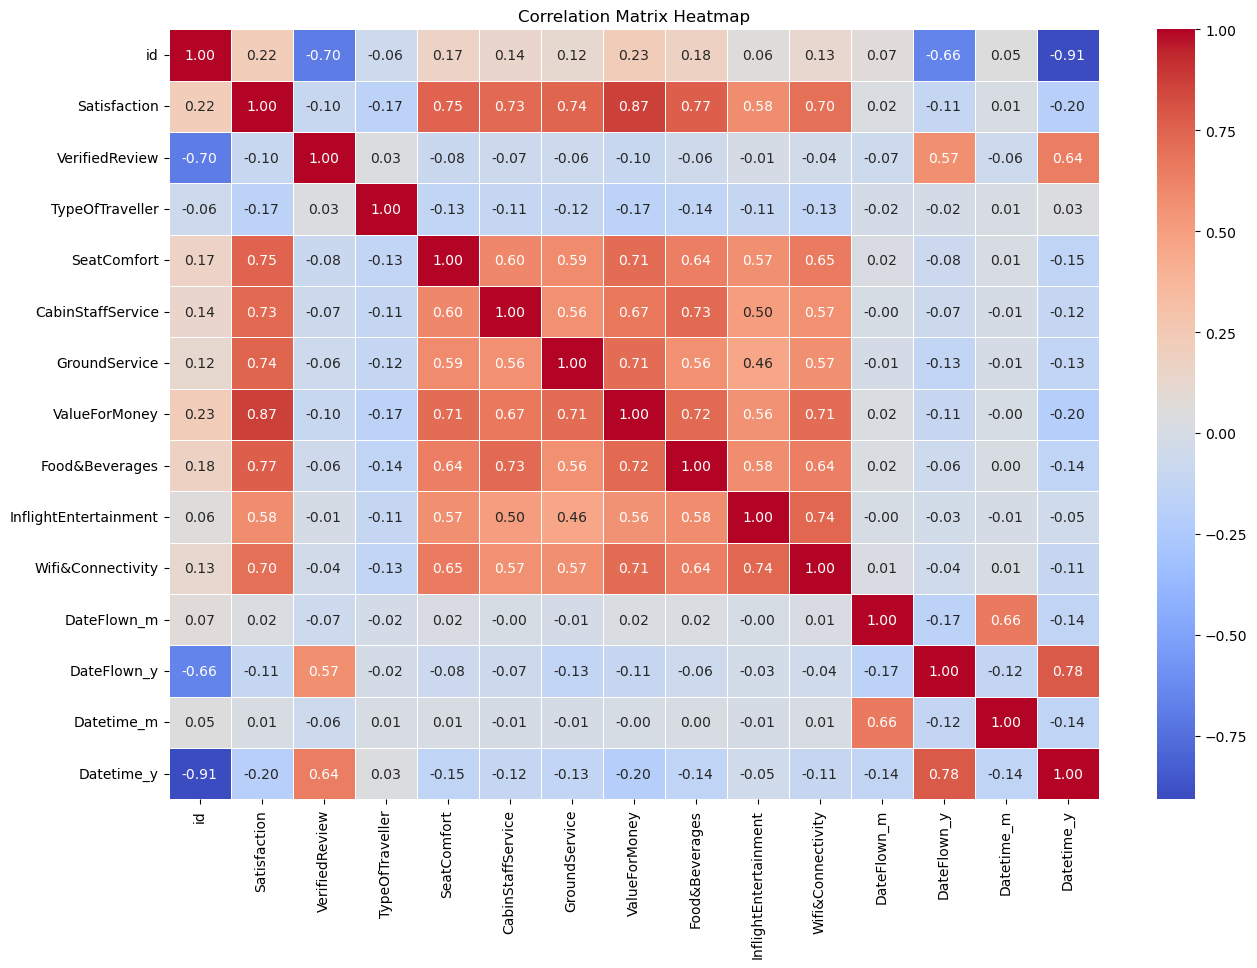

In [423]:
import seaborn as sns

# pengecekan correlation antar kolom sebelum melakukan encoding
correlation = data.corr()
print(correlation)
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [430]:
print("Number of unique :", data['Aircraft'].nunique())

Number of unique : 201


In [425]:
print("Number of unique :", data['Datetime_y'].nunique())
print("Number of unique :", data['Datetime_m'].nunique())
print("Number of unique :", data['DateFlown_y'].nunique())
print("Number of unique :", data['DateFlown_m'].nunique())

Number of unique : 11
Number of unique : 11
Number of unique : 10
Number of unique : 12


In [426]:
display(data.head())

,id,Satisfaction,ReviewHeader,Name,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,SeatComfort,...,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity,DateFlown_m,DateFlown_y,Datetime_m,Datetime_y
0,0,1,"""Service level far worse then Ryanair""",L Keele,1,4 Hours before takeoff we received a Mail stat...,2,Economy Class,London to Stuttgart,1,...,1,no,Boeing 777,1,1,1.0,10.0,9.0,9,10
1,1,3,"""do not upgrade members based on status""",Austin Jones,1,I recently had a delay on British Airways from...,4,Economy Class,Brussels to London,2,...,2,no,A320,1,2,2.0,10.0,9.0,9,10
2,2,8,"""Flight was smooth and quick""",M A Collie,0,"Boarded on time, but it took ages to get to th...",2,Business Class,London Heathrow to Dublin,3,...,3,yes,A320,4,2,2.0,10.0,9.0,9,10
3,3,1,"""Absolutely hopeless airline""",Nigel Dean,1,"5 days before the flight, we were advised by B...",2,Economy Class,London to Dublin,3,...,1,no,Boeing 777,3,2,1.0,11.0,8.0,9,10
4,4,1,"""Customer Service is non existent""",Gaylynne Simpson,0,"We traveled to Lisbon for our dream vacation, ...",2,Economy Class,London to Lisbon,1,...,1,no,A320,1,1,1.0,10.0,9.0,9,10


In [427]:
data.isnull().sum()
data.dtypes

id                         int64
Satisfaction               int64
ReviewHeader              object
Name                      object
VerifiedReview             int32
ReviewBody                object
TypeOfTraveller            int64
SeatType                  object
Route                     object
SeatComfort                int32
CabinStaffService          int32
GroundService              int32
ValueForMoney              int32
Recommended               object
Aircraft                  object
Food&Beverages             int32
InflightEntertainment      int32
Wifi&Connectivity        float64
DateFlown_m              float64
DateFlown_y              float64
Datetime_m                 int64
Datetime_y                 int64
dtype: object

In [428]:
# import tensorflor.keras as keras
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
